In [1]:
import os
import keras
import cv2
from PIL import Image
import pandas as pd
import numpy as np
from numpy import zeros
from numpy import ones
from numpy.random import randint
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Dropout
from keras.layers import BatchNormalization
from matplotlib import pyplot as plt
from tensorflow.keras.utils import plot_model

2024-04-14 15:29:06.807416: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-14 15:29:06.807563: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-14 15:29:06.987734: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [7]:

# Define the name of the folder you want to create
folder_name1 = "hubble_resized_img"
folder_name2 = "noise_resized_img"


# Specify the path where you want to create the folder
output_dir = "/kaggle/working/"

# Combine the path and folder name to create the full path
folder_path1 = os.path.join(output_dir, folder_name1)
folder_path2 = os.path.join(output_dir, folder_name2)

# Check if the folder already exists, if not, create it
if not os.path.exists(folder_path1):
    os.makedirs(folder_path1)
    print("Folder created successfully.")
else:
    print("Folder already exists.")

if not os.path.exists(folder_path2):
    os.makedirs(folder_path2)
    print("Folder created successfully.")
else:
    print("Folder already exists.")

Folder created successfully.
Folder already exists.


In [9]:
    
    


image_sizes = {}
image_dir = '/kaggle/input/hubblegalaxies/hubble galaxies/hubble new images'
output_image_dir = "/kaggle/working/hubble_resized_img"
max_size = (512, 512)

for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    output_image_path = os.path.join(output_image_dir, filename)

    try:
        # Open the image
        img = Image.open(image_path)
        
        # Resize the image if necessary
        if img.size[0] * img.size[1] > max_size[0] * max_size[1]:
            # Calculate the resizing factor to fit within the maximum allowed size
            #resizing_factor = min(max_size[0] / img.size[0], max_size[1] / img.size[1])

            # Calculate the new size after resizing
            new_size = (512,512)

            # Resize the image
            img_resized = img.resize(new_size, Image.LANCZOS)

            # Save the resized image to a new file
            img_resized.save(output_image_path)

            print("Image resized successfully.")
        else:
            print("Image size is within the maximum allowed size.")
    except Exception as e:
        print(f"Error processing {filename}: {e}")
    finally:
        # Close the image in the finally block to ensure it's closed regardless of any exceptions
        img.close()

for filename, size in image_sizes.items():
    print(f"Image: {filename}, Size: {size[0]} x {size[1]} pixels")


Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized succes

In [4]:
image_sizes = {}
image_dir = '/kaggle/input/hubblegalaxies/hubble galaxies/noisy_images'
output_image_dir = "/kaggle/working/noise_resized_img"
max_size = (512, 512)

for filename in os.listdir(image_dir):
    image_path = os.path.join(image_dir, filename)
    output_image_path = os.path.join(output_image_dir, filename)

    try:
        # Open the image
        img = Image.open(image_path)
        
        # Resize the image if necessary
        if img.size[0] * img.size[1] > max_size[0] * max_size[1]:
            # Calculate the resizing factor to fit within the maximum allowed size
            #resizing_factor = min(max_size[0] / img.size[0], max_size[1] / img.size[1])

            # Calculate the new size after resizing
            new_size = (512,512)

            # Resize the image
            img_resized = img.resize(new_size, Image.LANCZOS)

            # Save the resized image to a new file
            img_resized.save(output_image_path)

            print("Image resized successfully.")
        else:
            print("Image size is within the maximum allowed size.")
    except Exception as e:
        print(f"Error processing {filename}: {e}")
    finally:
        # Close the image in the finally block to ensure it's closed regardless of any exceptions
        img.close()

for filename, size in image_sizes.items():
    print(f"Image: {filename}, Size: {size[0]} x {size[1]} pixels")


Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized successfully.
Image resized succes

In [11]:

# Open the image file
image_path = "/kaggle/input/hubblegalaxies/hubble galaxies/hubble new images/a-beautiful-spiral-in-tucana-ngc-406_27563592807_o.jpg"  # Replace "path_to_your_image.jpg" with the actual path to your image file
image_path2 = "/kaggle/working/hubble_resized_img/ngc-5283-a-beautiful-luminous-galaxy_53438517225_o.jpg"
image = Image.open(image_path)
image2 = Image.open(image_path2)

# Get the original size of the image
original_size = image.size
resized_img = image2.size


# Print the original size
print("Original size of the image:", original_size)
print("resized size of the image:", resized_img)



Original size of the image: (3245, 1906)
resized size of the image: (512, 512)


In [13]:
def calculate_new_size(original_size, max_size):
    # Calculate the resizing factor for width and height
    width_factor = max_size[0] / original_size[0]
    height_factor = max_size[1] / original_size[1]

    # Use the smaller resizing factor to maintain aspect ratio
    resizing_factor = min(width_factor, height_factor)

    # Calculate the new width and height
    new_width = int(original_size[0] * resizing_factor)
    new_height = int(original_size[1] * resizing_factor)

    return (new_width, new_height)

# Example usage:
original_size = (3245, 1906)  # Example original image size
max_size = (512, 512)      # Example maximum size to fit into

new_size = calculate_new_size(original_size, max_size)
print("New size after resizing:", new_size)


New size after resizing: (512, 300)


In [14]:

# Open the image
img = Image.open("/kaggle/input/hubblegalaxies/hubble galaxies/hubble new images/grand-design-spiral-galaxy-messier-81-m81_27416362597_o.jpg")
# Define the maximum allowed size
max_allowed_size = (1000, 1000)  # Adjust as needed

# Check if the image size exceeds the maximum allowed size
if img.size[0] > max_allowed_size[0] or img.size[1] > max_allowed_size[1]:
    # Resize the image to fit within the maximum allowed size
    img.thumbnail(max_allowed_size, Image.LANCZOS)

    # Save the resized image to a new file
    img.save("resized_grand-design-spiral-galaxy-messier-81-m81_27416362597_o.jpg")

    print("Image resized successfully.")
else:
    print("Image size is within the maximum allowed size.")



DecompressionBombError: Image size (343824000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [15]:
file_path="/kaggle/input/hubblegalaxies/hubble galaxies/hubble new images"
for filename in os.listdir(file_path):
    img = Image.open(os.path.join(file_path, filename))
    print(img.size)

(3308, 3308)
(1500, 1200)
(3818, 3910)
(975, 958)
(11405, 7419)
(1365, 1458)
(2550, 2591)
(11477, 7965)
(4871, 4382)
(1541, 1389)
(4075, 3968)
(3936, 3849)
(1381, 1063)
(3519, 1582)
(3871, 1836)
(2013, 1852)
(4090, 2694)
(849, 933)
(3854, 3815)
(1270, 1038)
(6576, 7614)
(3970, 3970)
(3807, 2679)
(1929, 1437)
(3640, 3640)
(683, 1462)
(11472, 6429)
(1222, 1276)
(3834, 3909)
(3439, 3077)
(11405, 7419)
(897, 1065)
(3539, 4016)
(3363, 2047)
(3105, 3163)
(2771, 3464)
(2631, 3289)
(3681, 3823)
(8736, 5630)
(1153, 821)
(1435, 732)
(1766, 1948)
(5075, 5092)
(3892, 3065)
(4077, 3978)
(428, 427)
(3840, 3928)
(1280, 852)
(2769, 2034)
(3577, 2316)
(9500, 7400)
(2730, 2533)
(1559, 1532)
(3147, 1972)
(11423, 4177)
(745, 745)
(3918, 2052)
(753, 736)
(4032, 3483)
(3024, 3024)
(4070, 2691)
(4633, 3590)
(4030, 3809)
(3381, 1305)
(3363, 3675)
(564, 573)
(2641, 1796)
(4083, 3936)
(3730, 1961)
(1041, 765)
(3772, 3652)
(3344, 3055)
(2649, 3288)
(3227, 1890)
(1425, 1069)
(3989, 3624)
(747, 747)
(4182, 3897)
(

DecompressionBombError: Image size (343824000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [17]:


# Function to get the size of an image
def get_image_size(image_path):
    try:
        with Image.open(image_path) as img:
            width, height = img.size
        return width, height
    except (IOError, OSError) as e:
        if 'decoder' in str(e):
            print(f"Skipping image {image_path} due to decoder error.")
        elif 'pixels' in str(e):
            print(f"Skipping image {image_path} due to size limit exceeded.")
        return None, None

# Directory containing the images
image_folder = '/kaggle/input/hubblegalaxies/hubble galaxies/hubble new images'

# Dictionary to store image information
image_info = {'ImageID': [], 'Width': [], 'Height': [], 'Shape': []}

# Iterate over the image files
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        width, height = get_image_size(image_path)
        if width is not None and height is not None:
            image_id = os.path.splitext(filename)[0]  # Extract the image ID from the filename
            image_shape = (width, height)
            image_info['ImageID'].append(image_id)
            image_info['Width'].append(width)
            image_info['Height'].append(height)
            image_info['Shape'].append(image_shape)

# Create a DataFrame from the dictionary
df = pd.DataFrame(image_info)

# Display the DataFrame
print(df)


DecompressionBombError: Image size (343824000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [18]:
import os
import pandas as pd
from PIL import Image

# Function to resize and get the size of an image
def resize_and_get_size(image_path, max_size=(1000, 1000)):
    try:
        with Image.open(image_path) as img:
            img.thumbnail(max_size)
            width, height = img.size
        return width, height
    except (IOError, OSError) as e:
        if 'decoder' in str(e):
            print(f"Skipping image {image_path} due to decoder error.")
        elif 'pixels' in str(e):
            print(f"Skipping image {image_path} due to size limit exceeded.")
        return None, None

# Directory containing the images
image_folder = '/kaggle/input/hubblegalaxies/hubble galaxies/hubble new images'

# Dictionary to store image information
image_info = {'ImageID': [], 'Width': [], 'Height': [], 'Shape': []}

# Iterate over the image files
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(image_folder, filename)
        width, height = resize_and_get_size(image_path)
        if width is not None and height is not None:
            image_id = os.path.splitext(filename)[0]  # Extract the image ID from the filename
            image_shape = (width, height)
            image_info['ImageID'].append(image_id)
            image_info['Width'].append(width)
            image_info['Height'].append(height)
            image_info['Shape'].append(image_shape)

# Create a DataFrame from the dictionary
df = pd.DataFrame(image_info)

# Display the DataFrame
print(df)


DecompressionBombError: Image size (343824000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [19]:
file_path="/kaggle/working/noise_resized_img"
for filename in os.listdir(file_path):
    img = Image.open(os.path.join(file_path, filename))
    print(img.size)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load input and noise images
input_images_folder = '/kaggle/working/hubble_resized_img'
noise_images_folder = '/kaggle/working/noise_resized_img'

# Load and preprocess images
# Example code to load and preprocess images (you may need to adjust based on your dataset)
input_images = []  # List to store preprocessed input images
noise_images = []  # List to store preprocessed noise images

# Loop through input images folder
for filename in os.listdir(input_images_folder):
    img = cv2.imread(os.path.join(input_images_folder, filename))
    input_images.append(img)

# Loop through noise images folder
for filename in os.listdir(noise_images_folder):
    img = cv2.imread(os.path.join(noise_images_folder, filename))
    noise_images.append(img)

# Convert lists to numpy arrays
input_images = np.array(input_images)
noise_images = np.array(noise_images)

# Combine input and noise images into pairs
dataset = (input_images, noise_images)

# Define image shape
image_shape = input_images[0].shape

print(image_shape)


(512, 512, 3)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


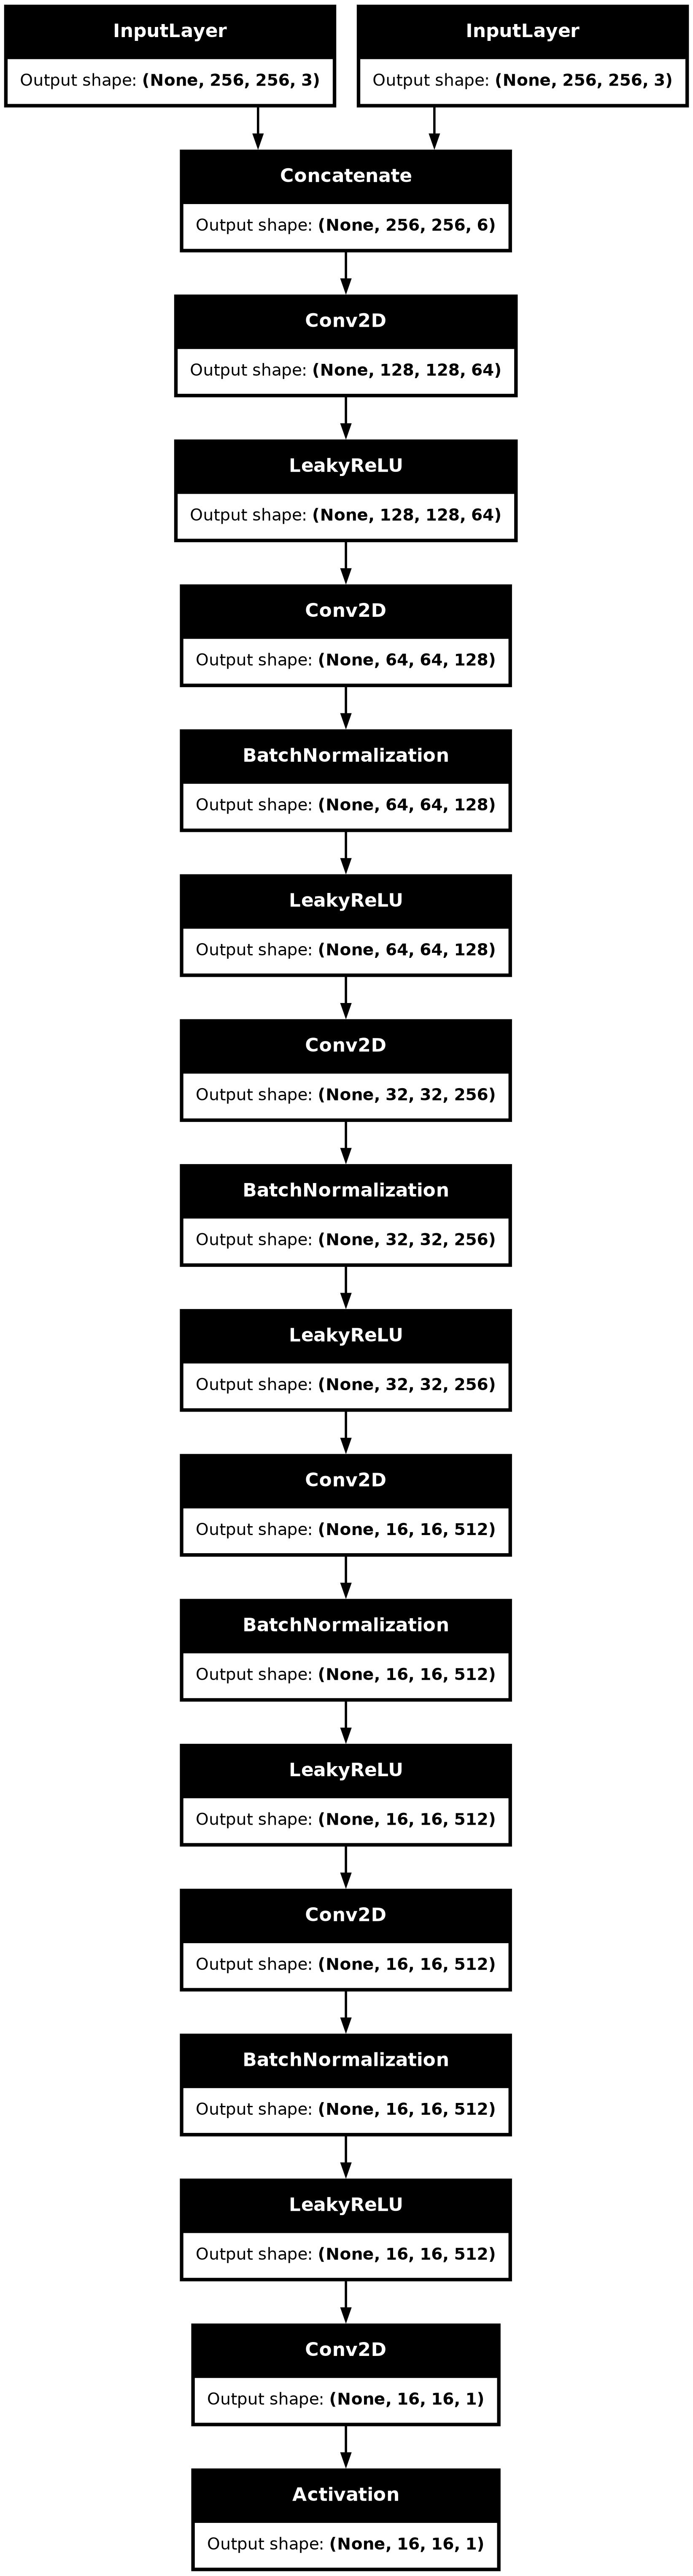

In [21]:
def define_discriminator(image_shape):
    
	# weight initialization
	init = RandomNormal(stddev=0.02) #As described in the original paper
    
	# source image input
	in_src_image = Input(shape=image_shape)  #Image we want to convert to another image
	# target image input
	in_target_image = Input(shape=image_shape)  #Image we want to generate after training. 
    
	# concatenate images, channel-wise
	merged = Concatenate()([in_src_image, in_target_image])
    
	# C64: 4x4 kernel Stride 2x2
	d = Conv2D(64, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(merged)
	d = LeakyReLU(alpha=0.2)(d)
	# C128: 4x4 kernel Stride 2x2
	d = Conv2D(128, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C256: 4x4 kernel Stride 2x2
	d = Conv2D(256, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# C512: 4x4 kernel Stride 2x2 
    # Not in the original paper. Comment this block if you want.
	d = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# second last output layer : 4x4 kernel but Stride 1x1
	d = Conv2D(512, (4,4), padding='same', kernel_initializer=init)(d)
	d = BatchNormalization()(d)
	d = LeakyReLU(alpha=0.2)(d)
	# patch output
	d = Conv2D(1, (4,4), padding='same', kernel_initializer=init)(d)
	patch_out = Activation('sigmoid')(d)
	# define model
	model = Model([in_src_image, in_target_image], patch_out)
	# compile model
    #The model is trained with a batch size of one image and Adam opt. 
    #with a small learning rate and 0.5 beta. 
    #The loss for the discriminator is weighted by 50% for each model update.
    
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, loss_weights=[0.5])
	return model

disc_model = define_discriminator((256,256,3))
plot_model(disc_model, to_file='disc_model.png', show_shapes=True)

In [23]:
def define_encoder_block(layer_in, n_filters, batchnorm=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add downsampling layer
	g = Conv2D(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# conditionally add batch normalization
	if batchnorm:
		g = BatchNormalization()(g, training=True)
	# leaky relu activation
	g = LeakyReLU(alpha=0.2)(g)
	return g

In [24]:
def decoder_block(layer_in, skip_in, n_filters, dropout=True):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# add upsampling layer
	g = Conv2DTranspose(n_filters, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(layer_in)
	# add batch normalization
	g = BatchNormalization()(g, training=True)
	# conditionally add dropout
	if dropout:
		g = Dropout(0.5)(g, training=True)
	# merge with skip connection
	g = Concatenate()([g, skip_in])
	# relu activation
	g = Activation('relu')(g)
	return g

In [26]:
def define_generator(image_shape=(256,256,3)):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# encoder model: C64-C128-C256-C512-C512-C512-C512-C512
	e1 = define_encoder_block(in_image, 64, batchnorm=False)
	e2 = define_encoder_block(e1, 128)
	e3 = define_encoder_block(e2, 256)
	e4 = define_encoder_block(e3, 512)
	e5 = define_encoder_block(e4, 512)
	e6 = define_encoder_block(e5, 512)
	e7 = define_encoder_block(e6, 512)
	# bottleneck, no batch norm and relu
	b = Conv2D(512, (4,4), strides=(2,2), padding='same', kernel_initializer=init)(e7)
	b = Activation('relu')(b)
	# decoder model: CD512-CD512-CD512-C512-C256-C128-C64
	d1 = decoder_block(b, e7, 512)
	d2 = decoder_block(d1, e6, 512)
	d3 = decoder_block(d2, e5, 512)
	d4 = decoder_block(d3, e4, 512, dropout=False)
	d5 = decoder_block(d4, e3, 256, dropout=False)
	d6 = decoder_block(d5, e2, 128, dropout=False)
	d7 = decoder_block(d6, e1, 64, dropout=False)
	# output
	g = Conv2DTranspose(image_shape[2], (4,4), strides=(2,2), padding='same', kernel_initializer=init)(d7) #Modified 
	out_image = Activation('tanh')(g)  #Generates images in the range -1 to 1. So change inputs also to -1 to 1
	# define model
	model = Model(in_image, out_image)
	return model

gen_model = define_generator((256,256,3))
plot_model(gen_model, to_file='gen_model.png', show_shapes=True)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [28]:
from keras import backend as K

# Define custom loss function combining binary cross-entropy and MAE
def custom_loss(y_true, y_pred):
    binary_crossentropy_loss = K.binary_crossentropy(y_true, y_pred)
    mae_loss = K.mean(K.abs(y_true - y_pred))
    return 0.01 * binary_crossentropy_loss + 1.0 * mae_loss




In [44]:
def define_gan(g_model, d_model, image_shape):
	# make weights in the discriminator not trainable
	for layer in d_model.layers:
		if not isinstance(layer, BatchNormalization):
			layer.trainable = False       #Descriminator layers set to untrainable in the combined GAN but 
                                                #standalone descriminator will be trainable.
            
	# define the source image
	in_src = Input(shape=image_shape)
	# suppy the image as input to the generator 
	gen_out = g_model(in_src)
	# supply the input image and generated image as inputs to the discriminator
	dis_out = d_model([in_src, gen_out])
	# src image as input, generated image and disc. output as outputs
	model = Model(in_src, [dis_out, gen_out])
	# compile model
	opt = Adam(learning_rate=0.0002, beta_1=0.5)
    
    #Total loss is the weighted sum of adversarial loss (BCE) and L1 loss (MAE)
    #Authors suggested weighting BCE vs L1 as 1:100.
	model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), 
               optimizer=opt,loss_weights=0.5)
    #model.compile(loss=keras.losses.custom_loss(from_logits=True), 
               #optimizer=opt,loss_weights=[0.5])
    #model.compile(loss=['binary_crossentropy', 'mse'], 
               #optimizer=opt,loss_weights=0.5)
	return model


In [36]:
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# unpack dataset
	trainA, trainB = dataset
	# choose random instances
	ix = randint(0, trainA.shape[0], n_samples)
	# retrieve selected images
	X1, X2 = trainA[ix], trainB[ix]
	# generate 'real' class labels (1)
	y = ones((n_samples, patch_shape, patch_shape, 1))
	return [X1, X2], y

In [38]:
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, samples, patch_shape):
	# generate fake instance
	X = g_model.predict(samples)
	# create 'fake' class labels (0)
	y = zeros((len(X), patch_shape, patch_shape, 1))
	return X, y

In [39]:
# generate samples and save as a plot and save the model
#GAN models do not converge, we just want to find a good balance between
#the generator and the discriminator. Therefore, it makes sense to periodically
#save the generator model and check how good the generated image looks. 
def summarize_performance(step, g_model, dataset, n_samples=3):
	# select a sample of input images
	[X_realA, X_realB], _ = generate_real_samples(dataset, n_samples, 1)
	# generate a batch of fake samples
	X_fakeB, _ = generate_fake_samples(g_model, X_realA, 1)
	# scale all pixels from [-1,1] to [0,1]
	X_realA = (X_realA + 1) / 2.0
	X_realB = (X_realB + 1) / 2.0
	X_fakeB = (X_fakeB + 1) / 2.0
	# plot real source images
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + i)
		plt.axis('off')
		plt.imshow(X_realA[i])
	# plot generated target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_fakeB[i])
	# plot real target image
	for i in range(n_samples):
		plt.subplot(3, n_samples, 1 + n_samples*2 + i)
		plt.axis('off')
		plt.imshow(X_realB[i])
	# save plot to file
	filename1 = 'plot_%06d.png' % (step+1)
	plt.savefig(filename1)
	plt.close()
	# save the generator model
	filename2 = 'model_%06d.h5' % (step+1)
	g_model.save(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))

In [41]:
# train pix2pix models
def train(d_model, g_model, gan_model, dataset, n_epochs=100, n_batch=1):
	# determine the output square shape of the discriminator
	n_patch = d_model.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		[X_realA, X_realB], y_real = generate_real_samples(dataset, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeB, y_fake = generate_fake_samples(g_model, X_realA, n_patch)
		# update discriminator for real samples
		d_loss1 = d_model.train_on_batch([X_realA, X_realB], y_real)
		# update discriminator for generated samples
		d_loss2 = d_model.train_on_batch([X_realA, X_fakeB], y_fake)
		# update the generator
		g_loss, _, _ = gan_model.train_on_batch(X_realA, [y_real, X_realB])
		# summarize performance
		print('>%d, d1[%.3f] d2[%.3f] g[%.3f]' % (i+1, d_loss1, d_loss2, g_loss))
		# summarize model performance
		if (i+1) % (bat_per_epo * 10) == 0:
			summarize_performance(i, g_model, dataset)

In [45]:
# Define discriminator, generator, and GAN model
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
gan_model = define_gan(g_model, d_model, image_shape)

# Train the model
train(d_model, g_model, gan_model, dataset, n_epochs=2, n_batch=1)

ValueError: Expected `loss_weights` argument to be a list, tuple, or dict. Received instead: loss_weights=0.5 of type <class 'float'>